In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agriculture-crop-yield/crop_yield.csv


In [3]:
import os 
import pandas as pd
import numpy as np


In [4]:
os.chdir('/kaggle/input/agriculture-crop-yield')

In [5]:
os.getcwd()

'/kaggle/input/agriculture-crop-yield'

In [6]:
df=pd.read_csv('crop_yield.csv')

In [7]:
df

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


In [8]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [9]:
df.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [10]:
df.dtypes

Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used              bool
Weather_Condition          object
Days_to_Harvest             int64
Yield_tons_per_hectare    float64
dtype: object

In [11]:
df.isnull()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder 

In [14]:
lb=LabelEncoder()

In [15]:
# Specify columns to encode
lb_col = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']

# Apply Label Encoding to each specified column
for col in lb_col:
    df[col] = lb.fit_transform(df[col])

In [19]:
df

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Fertilizer_Used_True,Irrigation_Used_True
0,3,4,1,897.077239,27.676966,0,122,6.555816,False,True
1,2,1,3,992.673282,18.026142,1,140,8.527341,True,True
2,1,2,0,147.998025,29.794042,2,106,1.127443,False,False
3,1,4,4,986.866331,16.644190,1,146,6.517573,False,True
4,2,5,5,730.379174,31.620687,0,110,7.248251,True,True
...,...,...,...,...,...,...,...,...,...,...
999995,3,5,3,302.805345,27.987428,2,76,1.347586,False,False
999996,2,0,0,932.991383,39.661039,1,93,7.311594,True,False
999997,1,3,1,867.362046,24.370042,0,108,5.763182,True,False
999998,3,5,5,492.812857,33.045505,2,102,2.070159,False,False


In [22]:
# # Creating dummy variables for 'Fertilizer_Used' and 'Irrigation_Used'
# df = pd.get_dummies(df, columns=['Fertilizer_Used', 'Irrigation_Used'], drop_first=True)

# # Check the new columns created
# print(df.columns)

# # Convert the new dummy variable columns to integers (0 and 1)
# # Adjust the column names based on what you see in the print output
# # Example: If the new column is 'Fertilizer_Used_Y' and 'Irrigation_Used_Y'
df['Fertilizer_Used'] = df['Fertilizer_Used'].astype(int)
df['Irrigation_Used'] = df['Irrigation_Used'].astype(int)

In [23]:
df

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Fertilizer_Used_True,Irrigation_Used_True
0,3,4,1,897.077239,27.676966,0,122,6.555816,0,1
1,2,1,3,992.673282,18.026142,1,140,8.527341,1,1
2,1,2,0,147.998025,29.794042,2,106,1.127443,0,0
3,1,4,4,986.866331,16.644190,1,146,6.517573,0,1
4,2,5,5,730.379174,31.620687,0,110,7.248251,1,1
...,...,...,...,...,...,...,...,...,...,...
999995,3,5,3,302.805345,27.987428,2,76,1.347586,0,0
999996,2,0,0,932.991383,39.661039,1,93,7.311594,1,0
999997,1,3,1,867.362046,24.370042,0,108,5.763182,1,0
999998,3,5,5,492.812857,33.045505,2,102,2.070159,0,0


In [25]:
# Separate features and target variable
X = df.drop('Yield_tons_per_hectare', axis=1)  # Features
y = df['Yield_tons_per_hectare']  # Target variable

In [26]:
X

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Weather_Condition,Days_to_Harvest,Fertilizer_Used_True,Irrigation_Used_True
0,3,4,1,897.077239,27.676966,0,122,0,1
1,2,1,3,992.673282,18.026142,1,140,1,1
2,1,2,0,147.998025,29.794042,2,106,0,0
3,1,4,4,986.866331,16.644190,1,146,0,1
4,2,5,5,730.379174,31.620687,0,110,1,1
...,...,...,...,...,...,...,...,...,...
999995,3,5,3,302.805345,27.987428,2,76,0,0
999996,2,0,0,932.991383,39.661039,1,93,1,0
999997,1,3,1,867.362046,24.370042,0,108,1,0
999998,3,5,5,492.812857,33.045505,2,102,0,0


In [27]:
y

0         6.555816
1         8.527341
2         1.127443
3         6.517573
4         7.248251
            ...   
999995    1.347586
999996    7.311594
999997    5.763182
999998    2.070159
999999    2.937243
Name: Yield_tons_per_hectare, Length: 1000000, dtype: float64

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:

# Create a linear regression model
model = LinearRegression()


In [32]:
# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [34]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 0.25077179363715535
R^2 Score: 0.913015461869577
                      Coefficient
Region                  -0.000321
Soil_Type               -0.000278
Crop                    -0.000204
Rainfall_mm              0.004997
Temperature_Celsius      0.019936
Weather_Condition       -0.000125
Days_to_Harvest          0.000020
Fertilizer_Used_True     1.499403
Irrigation_Used_True     1.199213


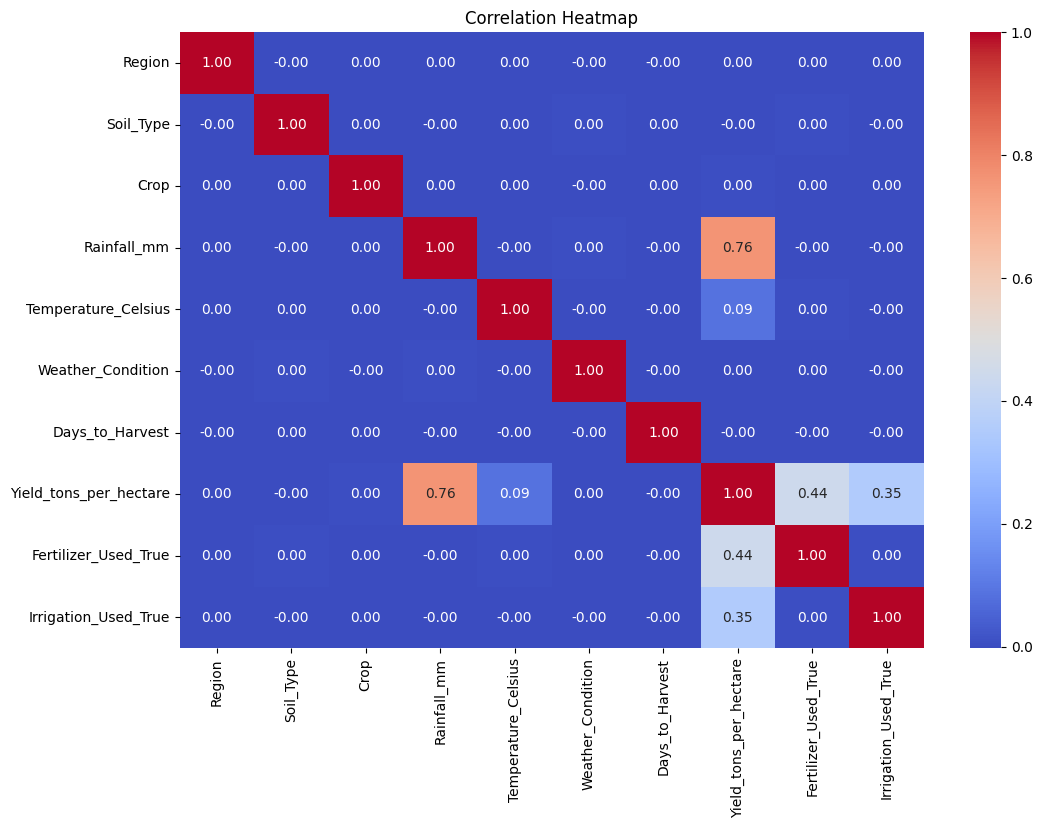

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


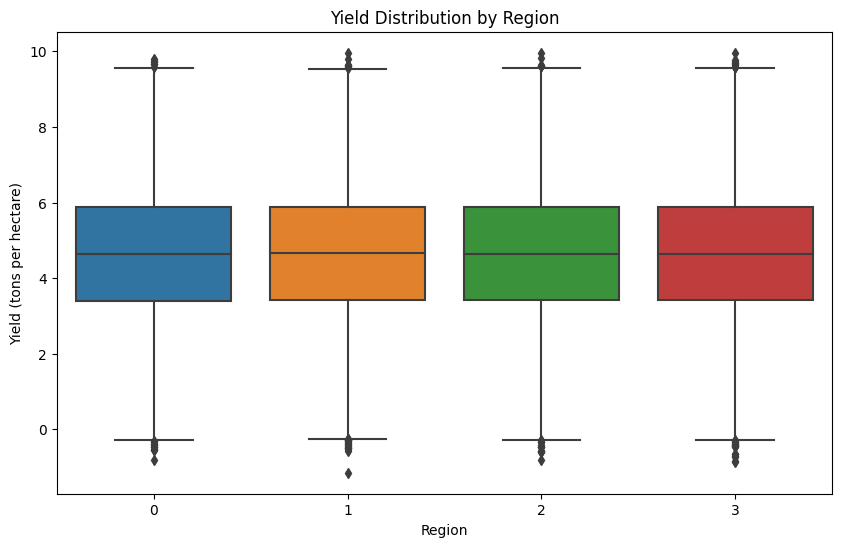

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Yield_tons_per_hectare')
plt.title('Yield Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Yield (tons per hectare)')
plt.show()


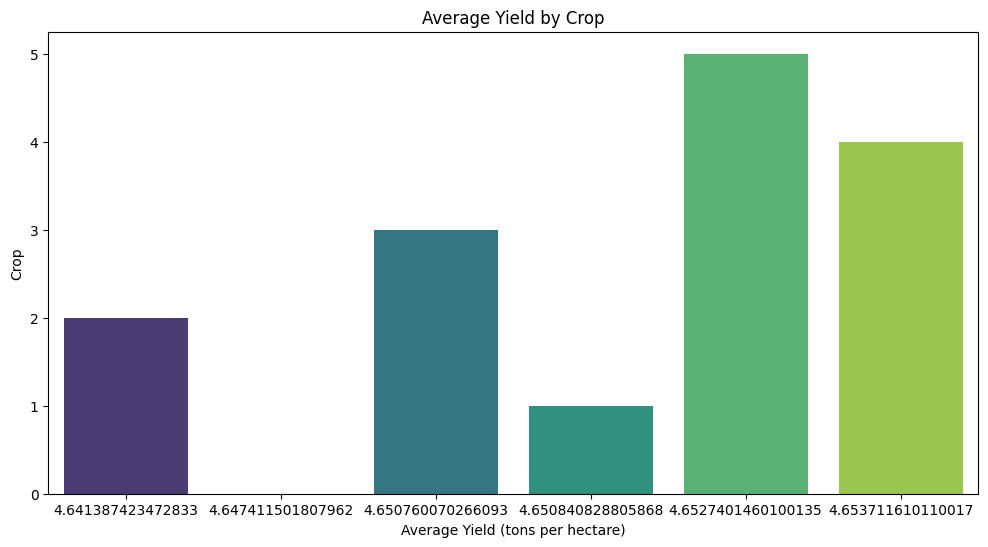

In [39]:
plt.figure(figsize=(12, 6))
average_yield = df.groupby('Crop')['Yield_tons_per_hectare'].mean().sort_values()
sns.barplot(x=average_yield.values, y=average_yield.index, palette='viridis')
plt.title('Average Yield by Crop')
plt.xlabel('Average Yield (tons per hectare)')
plt.ylabel('Crop')
plt.show()


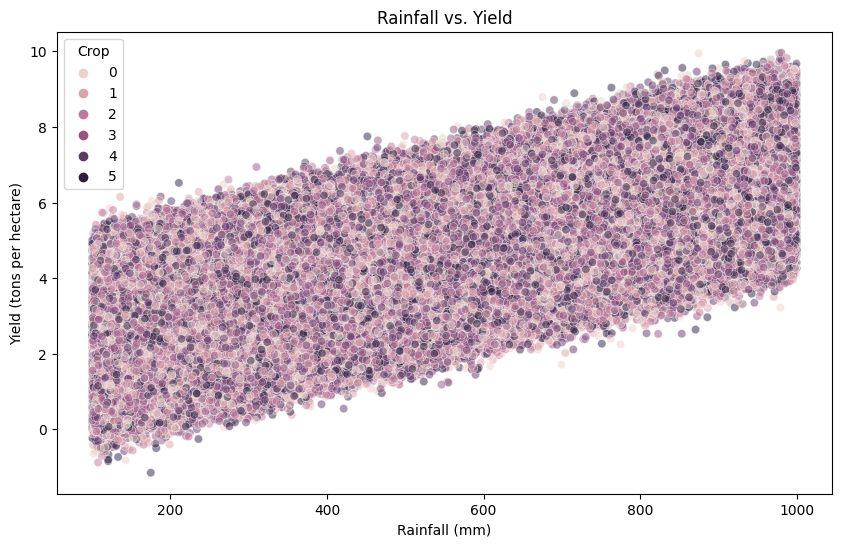

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rainfall_mm', y='Yield_tons_per_hectare', hue='Crop', alpha=0.5)
plt.title('Rainfall vs. Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (tons per hectare)')
plt.legend(title='Crop')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

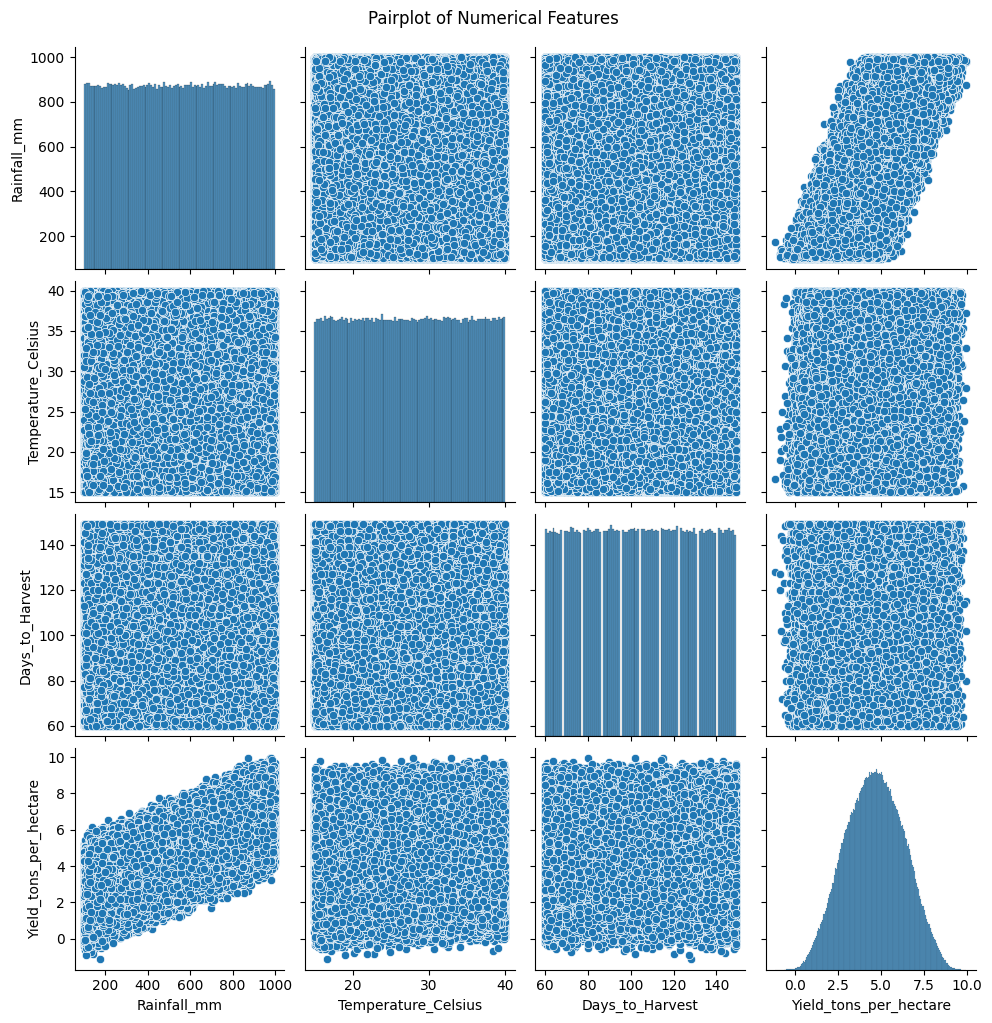

In [41]:
sns.pairplot(df[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


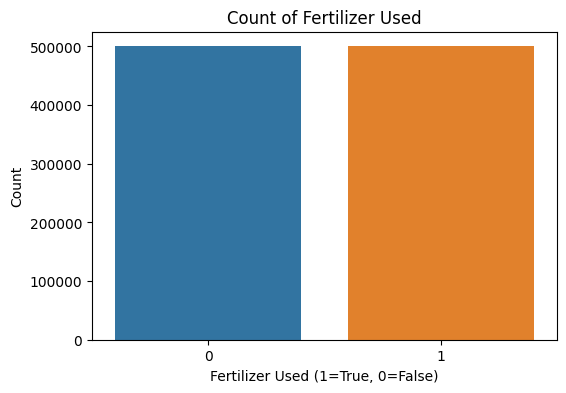

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Fertilizer_Used_True')
plt.title('Count of Fertilizer Used')
plt.xlabel('Fertilizer Used (1=True, 0=False)')
plt.ylabel('Count')
plt.show()


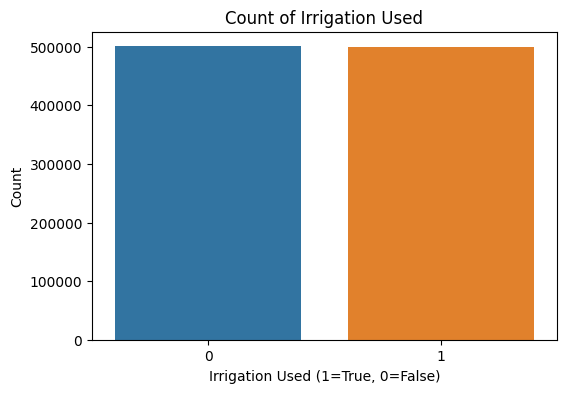

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Irrigation_Used_True')
plt.title('Count of Irrigation Used')
plt.xlabel('Irrigation Used (1=True, 0=False)')
plt.ylabel('Count')
plt.show()


In [44]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest - MSE: {rf_mse:.2f}, R^2: {rf_r2:.2f}")


Random Forest - MSE: 0.27, R^2: 0.91


In [47]:
# Initialize and fit the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_predictions = gb_model.predict(X_test)

# Evaluation
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print(f"Gradient Boosting - MSE: {gb_mse:.2f}, R^2: {gb_r2:.2f}")


Gradient Boosting - MSE: 0.25, R^2: 0.91
